# [Q1] Logistic Regression 모형 구축을 위해 필요하지 않은 변수는 어떤 것들이 있는가? 왜 그렇게 생각하는가? 

In [1]:
install.packages("moments") 
install.packages("corrplot")
library(moments)
library(corrplot)

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmwlm\AppData\Local\Temp\Rtmp4Opsqm\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmwlm\AppData\Local\Temp\Rtmp4Opsqm\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [2]:
df <- read.csv('Admission_Predict_Ver1.1.csv')
str(df)
head(df)
length(unique(df$Serial.No.)) == nrow(df) #Serial.No.가 중복된 것이 있는지 확인
sum(is.na(df)) # 데이터에 NULL값이 있는지 확인

'data.frame':	500 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 302 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : int  1 1 1 1 0 1 1 0 0 0 ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90


[1] TRUE

[1] 0

In [3]:
df <- subset(df,select=-Serial.No.) # Serial.No. 제거

# [Q2] 개별 입력 변수들에 대하여 각각 다음과 같은 단변량 통계량을 계산하고 Box plot을 도시하시오: Mean, Standard deviation, Skewness, Kurtosis. 전체 변수 중에서 정규분포를 따른다고 할 수 있는 변수 들은 몇 개인가? 정규분포를 따른다고 가정한 근거는 무엇인가? 

In [4]:
statics_mat <- matrix(c(1:7*4),nrow=7,ncol=4) # 통계량을 넣어둘 matrix생성
colnames(statics_mat) <- c("mean","std","skewness","kurtosis") # 열 이름지정
rownames(statics_mat) <- colnames(df[1:7]) # 행 이름 지정
# 통계량 계산해서 넣는 부분
for(i in 1:7){
    statics_mat[i,1] = mean(unlist(df[,i+1]))
    statics_mat[i,2] = sqrt(var(df[,i+1]))
    statics_mat[i,3] = skewness(df[,i+1])
    statics_mat[i,4] = kurtosis(df[,i+1])
}
statics_mat

,mean,std,skewness,kurtosis
GRE.Score,107.19200,6.0818677,0.09531393,2.341293
TOEFL.Score,3.11400,1.1435118,0.09002387,2.186022
University.Rating,3.37400,0.9910036,-0.22828491,2.289344
SOP,3.48400,0.9254496,-0.14485408,2.249712
LOR,8.57644,0.6048128,-0.02653261,2.432343
CGPA,0.56000,0.4968841,-0.24174689,1.058442
Research,0.72174,0.1411404,-0.28909559,2.537876


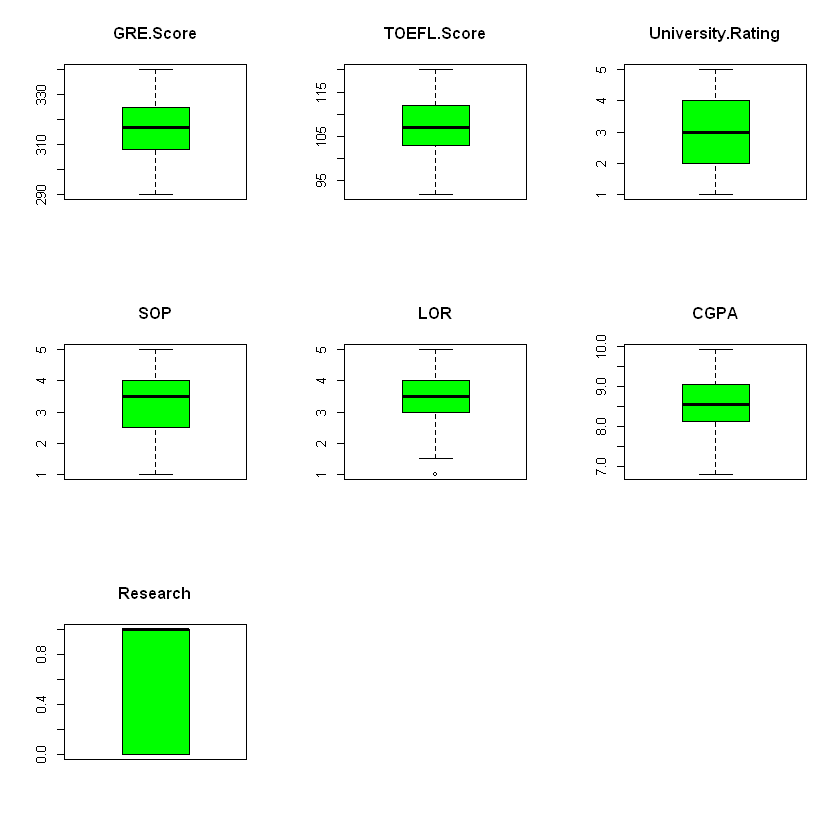

In [5]:
par(mfrow=c(3,3)) # y축 범위는 min, max를 이용
for(i in 1:7){
    boxplot(df[,i],xlab ="",ylim = c(min(df[,i]),max(df[,i]))
            ,main = paste(colnames(df[i])),col=c("green","yellow"))
}

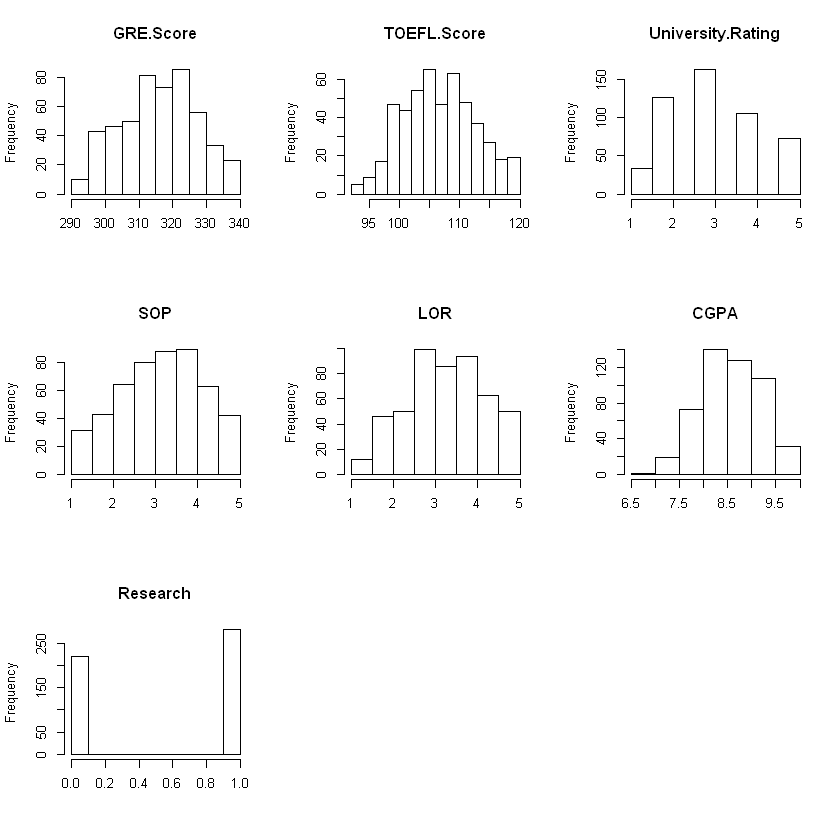

In [6]:
# 히스토그램 그리기
par(mfrow=c(3,3))
for(i in 1:7){
    hist(df[,i],xlab ="",main = paste(colnames(df[i])))
}

# [Q3] [Q2]의 Box plot을 근거로 각 변수들에 대한 이상치(너무 값이 크거나 작은 객체) 조건을 정의하고, 해당하는 객체들을 데이터셋에서 제거해 보시오. 

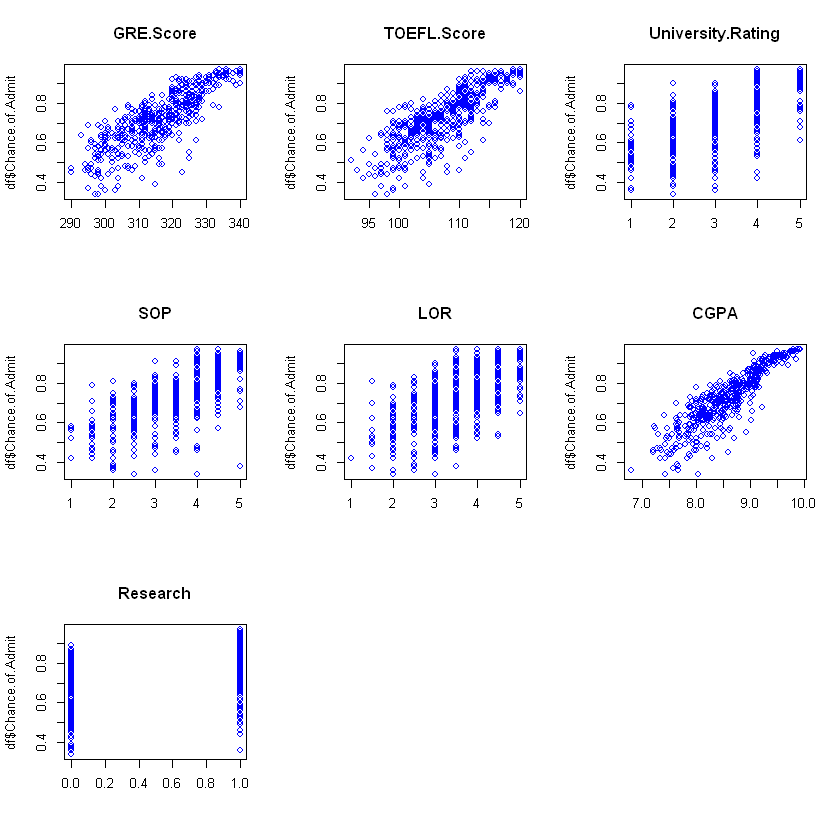

In [7]:
# scatter plot그리기
par(mfrow = c(3,3))
for(i in 1:7){
    plot(df[,i],df$Chance.of.Admit, main = names(df[i]),ylab = names(df$Chance.of.Admit),xlab = "", col = "blue")
}

In [8]:
# 각 칼럼들의 이상치의 값을 그래프로 확인하여 제거했습니다. 
df$SOP <- ifelse(df$SOP==5 & df$Chance.of.Admit <0.5, NA,df$SOP)
df$LOR <- ifelse(df$LOR == 1, NA,df$LOR)
df <- na.omit(df)

# [Q4] 가능한 모든 두 쌍의 입력 변수 조합에 대한 산점도(scatter plot) 및 Correlation plot (hint: “corrplot” 패키지의 corrplot( ) 함수 사용) 상관관계를 계산해 보시오. 어떤 두 조합의 변수들이 서로 강 한 상관관계가 있다고 할 수 있는가? 

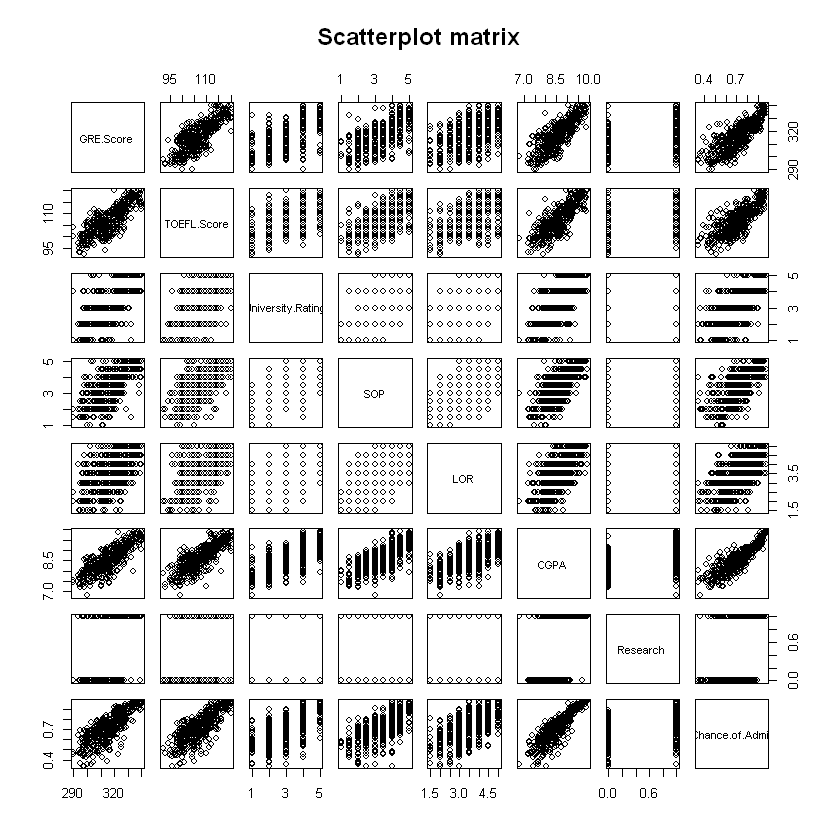

In [9]:
# scatter plot 그리기
pairs(~., data = df, main = "Scatterplot matrix")

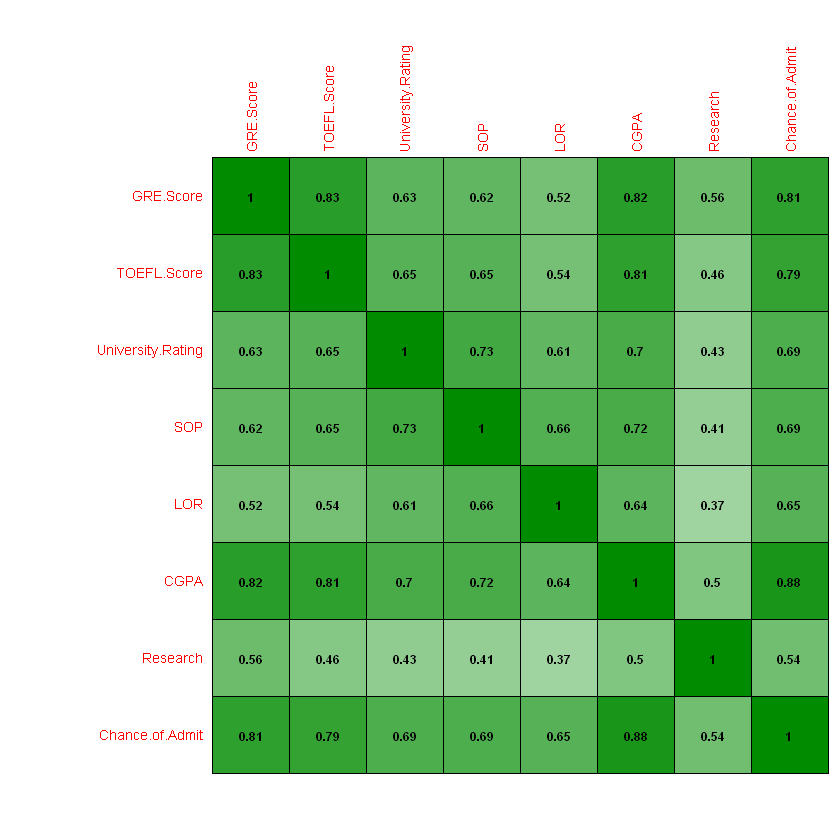

In [10]:
corr <- cor(df) # 모든 칼럼에 대한 corr 그래프
corrplot(corr, method = "color", outline = T, cl.pos = "n", rect.col = "black", tl.col = "red",addCoef.col = "black",
        number.digits = 2, number.cex = 0.60, tl.cex = 0.7, cl.cex = 1, col = colorRampPalette(c("red","white","green4"))(100))

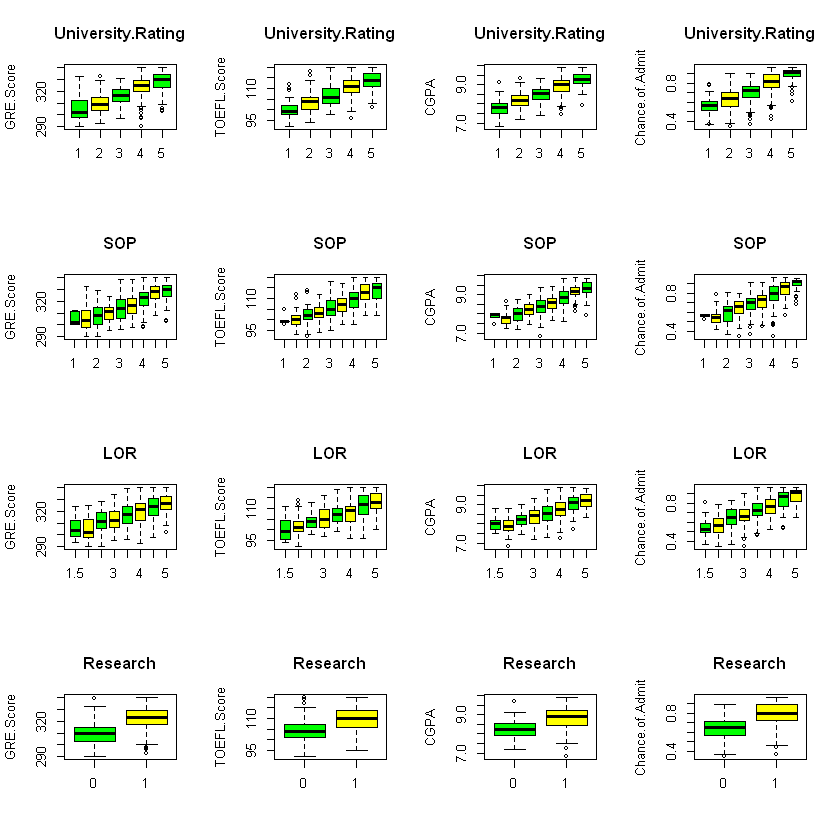

In [11]:
# box plot 그리기
conti = c(1,2,6,8) # 연속형 변수 index
categ = c(3,4,5,7) # 범주형 변수 index
par(mfrow = c(4,4))
for(i in categ){
    for(j in conti){
        boxplot(df[,j]~df[,i], xlab ="",ylab = names(df[j]), main=names(df[i]), col=c("green","yellow"))
    }
}

# [Q5] 종속변수인 Change of Admit은 원래 데이터에서는 0부터 1사이의 확률 값으로 표현되어 있다. 이를 0.8을 기준으로 하여 0.8을 초과하는 경우 1 (positive class), 0.8 이하인 경우 0 (negative class)의 값을 갖 는 binary target variable로 변환하시오. 이후 전체 데이터셋을 70%의 학습 데이터와 30%의 테스트 데이 터로 무작위(random)로 분할한 후 모든 변수를 사용하여 Logistic Regression 모델을 학습해 보시오. 유의수준(Significance level) 0.1에서 Change of Admit에 유의미하게 영향을 주는 변수들은 어떤 것들이 있는가? 

In [12]:
df$Chance.of.Admit <- as.factor(ifelse(df$Chance.of.Admit > 0.8,1,0)) # 1,0을 갖는 값으로 target 변수 변환

In [13]:
#scaling 하기
df_scaled <- df
df_scaled[,1:6] <- scale(df_scaled[,1:6],center = TRUE, scale = TRUE)
df_minmax <- df
for (i in 1:6){
    df_minmax[,i] <- (df_minmax[,i]-min(df_minmax[,i]))/(max(df_minmax[,i])-min(df_minmax[,i])) #minmax scaler 구현
}

In [14]:
set.seed(41)
trn_idx <- sample(1:nrow(df_scaled),round(0.7*nrow(df_scaled))) # sample함수를 이용해 trainset index저장
r_train <- df[trn_idx,]
r_test <- df[-trn_idx,]
s_train <- df_scaled[trn_idx,]
s_test <- df_scaled[-trn_idx,]
m_train <- df_minmax[trn_idx,]
m_test <- df_minmax[-trn_idx,]

In [15]:
r_lr <- glm(r_train$Chance.of.Admit ~ .,family = binomial, r_train) #scaling안한 데이터로 학습
summary(r_lr)


Call:
glm(formula = r_train$Chance.of.Admit ~ ., family = binomial, 
    data = r_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1673  -0.1527  -0.0239   0.0618   3.3243  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -85.23098   17.05356  -4.998 5.80e-07 ***
GRE.Score           0.02701    0.05862   0.461   0.6449    
TOEFL.Score         0.16418    0.08443   1.945   0.0518 .  
University.Rating   0.76298    0.36019   2.118   0.0342 *  
SOP                -0.38662    0.54036  -0.715   0.4743    
LOR                 0.24465    0.39751   0.615   0.5383    
CGPA                6.20278    1.45104   4.275 1.91e-05 ***
Research            0.63015    0.65279   0.965   0.3344    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 421.71  on 348  degrees of freedom
Residual deviance: 114.74  on 341  degrees of freedom
AIC: 13

In [16]:
s_lr <- glm(s_train$Chance.of.Admit ~ .,family = binomial, s_train) #standardscaler 데이터로 학습
summary(s_lr)


Call:
glm(formula = s_train$Chance.of.Admit ~ ., family = binomial, 
    data = s_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1673  -0.1527  -0.0239   0.0618   3.3243  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.9213     0.6747  -5.812 6.19e-09 ***
GRE.Score           0.3043     0.6603   0.461   0.6449    
TOEFL.Score         0.9929     0.5106   1.945   0.0518 .  
University.Rating   0.8712     0.4113   2.118   0.0342 *  
SOP                -0.3807     0.5320  -0.715   0.4743    
LOR                 0.2252     0.3659   0.615   0.5383    
CGPA                3.7345     0.8736   4.275 1.91e-05 ***
Research            0.6301     0.6528   0.965   0.3344    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 421.71  on 348  degrees of freedom
Residual deviance: 114.74  on 341  degrees of freedom
AIC: 130.74

Num

In [17]:
m_lr <- glm(m_train$Chance.of.Admit ~ .,family = binomial, m_train) # minmaxscaler데이터
summary(m_lr)


Call:
glm(formula = m_train$Chance.of.Admit ~ ., family = binomial, 
    data = m_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1673  -0.1527  -0.0239   0.0618   3.3243  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -19.3704     2.7298  -7.096 1.29e-12 ***
GRE.Score           1.3507     2.9312   0.461   0.6449    
TOEFL.Score         4.5970     2.3639   1.945   0.0518 .  
University.Rating   3.0519     1.4408   2.118   0.0342 *  
SOP                -1.5465     2.1614  -0.715   0.4743    
LOR                 0.8563     1.3913   0.615   0.5383    
CGPA               19.3527     4.5272   4.275 1.91e-05 ***
Research            0.6301     0.6528   0.965   0.3344    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 421.71  on 348  degrees of freedom
Residual deviance: 114.74  on 341  degrees of freedom
AIC: 130.74

Num

# [Q6] Test 데이터셋에 대하여 예측을 수행하고 Confusion Matrix를 생성한 뒤, True Positive Rate, True Negative Rate, False Positive Rate, False Negative Rate, Simple Accuracy, Balanced Correction Rate, F1-Measure를 각각 구하고 그 의미를 해석하시오. 

In [18]:
# confusion matrix를 만드는 함수
make_cm <- function(label, pred){
    tmp <- pred
    pred <- rep(0,length(pred))
    pred[which(tmp>0.5)] <- 1 # treshhold값은 0.5로 주었습니다.
    cm <- table(label, pred)
    
    return (cm)
}

In [19]:
#3개의 데이터에 대해서 각각 confusion matrix를 구합니다.
r_pred <- predict(r_lr, type="response", newdata = r_test[,1:7])
r_cm <- make_cm(r_test$Chance.of.Admit,r_pred)
s_pred <- predict(s_lr, type="response", newdata = s_test[,1:7])
s_cm <- make_cm(s_test$Chance.of.Admit,s_pred)
m_pred <- predict(m_lr, type="response", newdata = m_test[,1:7])
m_cm <- make_cm(m_test$Chance.of.Admit,m_pred)

In [20]:
# 결과가 모두 같습니다. ㅠㅠ
print(r_cm)
print(s_cm)
print(m_cm)

     pred
label   0   1
    0 106   3
    1   5  35
     pred
label   0   1
    0 106   3
    1   5  35
     pred
label   0   1
    0 106   3
    1   5  35


In [21]:
perf_eval2 <- function(cm){
  
  # True positive rate: TPR (Recall)  
  TPR <- cm[2,2]/sum(cm[2,]) #cm=>confusion matrix,R-script?뒗 ?삤由꾩감?닚?씠?뼱?꽌 TPR?씠 2?뻾.
  # True negative rate: TNR
  TNR <- cm[1,1]/sum(cm[1,])
  # False Positive Rate: FPR
  FPR <- cm[1,2]/sum(cm[1,])
  # False Negative Rate: FNR
  FNR <- cm[2,1]/sum(cm[2,])
  
  # Precision
  PRE <- cm[2,2]/sum(cm[,2])
  # Simple Accuracy
  ACC <- (cm[1,1]+cm[2,2])/sum(cm)
  # Balanced Correction Rate
  BCR <- sqrt(TPR*TNR)
  # F1-Measure
  F1 <- 2*TPR*PRE/(TPR+PRE)
  
  return(c(TPR, TNR, FPR, FNR, PRE, ACC, BCR, F1))
}

In [22]:
# Initialize the performance matrix
perf_mat <- matrix(0, 1, 8)
colnames(perf_mat) <- c("TPR (Recall)", "TNR","FPR","FNR","Precision", "ACC", "BCR", "F1")
rownames(perf_mat) <- "Logstic Regression"
perf_mat[1,] <- perf_eval2(s_cm)
perf_mat

,TPR (Recall),TNR,FPR,FNR,Precision,ACC,BCR,F1
Logstic Regression,0.875,0.9724771,0.02752294,0.125,0.9210526,0.9463087,0.9224519,0.8974359


# [Q7] Test 데이터셋에 대한 AUROC를 산출하는 함수를 직접 작성하고, random seed를 변경해가면서 학습-테스트를 5회 반복하여 산출된 AUROC값의 변화를 확인해보시오. 

In [23]:
ROC_calculation <- function(label, pred){
    tmp <-  sort(pred, decreasing = TRUE, index.return=TRUE) # 예측한 확률값들을 내림차순으로 정렬
    pred_pb <- pred[tmp$ix] # 내림차순으로 정렬한 index를 가져와 pred를 pred_pb에 정렬
    label <- label[tmp$ix] # 비교하는 label값도 순서가 같아야 하므로 내림차순한 인덱스 활용하여 정렬
    pred <- rep(0,length(pred)) # ROC커브에서 1,0으로 변환되는 것이 들어가는 곳
    dum <- matrix(0,nrow=2,ncol=1)
    #confusion matrix에서 둘다 0이 나오면, 한 칼럼이 사라진다. 그것을 방지하기 위한 매트릭스
    TPR <- c(length(pred)+1) # TPR값 저장소
    FPR <- c(length(pred)+1) # FPR값 저장소
    TPR[1] <- 0 # 처음값은 0이다.
    FPR[1] <- 0 # 처음값은 0이다.
    diff_FPR <- 0 # 면적 게산시에 가로축의 길이를 저장할 변수
    ROC <- 0 # ROC의 면적을 더해 갈 변수
    for(i in 1:length(pred)){
        pred[which(pred_pb >= pred_pb[i])] <- 1 # cutoff를 한칸씩 옮겨준다
        cm <- cbind(table(label, pred),dum) # confusion matrix생성. 혹시나 0,0 이 나오는 것을 대비해 dum 추가
        TPR[i+1] <- cm[2,2]/sum(cm[2,]) # TPR 계산
        FPR[i+1] <- cm[1,2]/sum(cm[1,]) # FPR 계산
        if(i>1){
            diff_FPR <- FPR[i+1] - FPR[(i)] # 가로축 길이 계산
        }
        ROC <- ROC + TPR[i+1]*diff_FPR # 면적 계산
        if (i == length(pred)){
            TPR[i+1] <- 1 
            # TPR의 마지막 값은 1이다. 그런데 confusion matrix가 열이 0 일때가 0,0이 나와 한칸 밀리게 된다.
            # 그것을 보정해 주기 위하여 1을 넣어준다.
            FPR[i+1] <- 1 # 위와 마찬가지
        }
    }
    
    plot(FPR, TPR, type = "l") # ROC커브 그리기

    return (ROC) #ROC 면적값 리턴
}

[1] 0.9807339

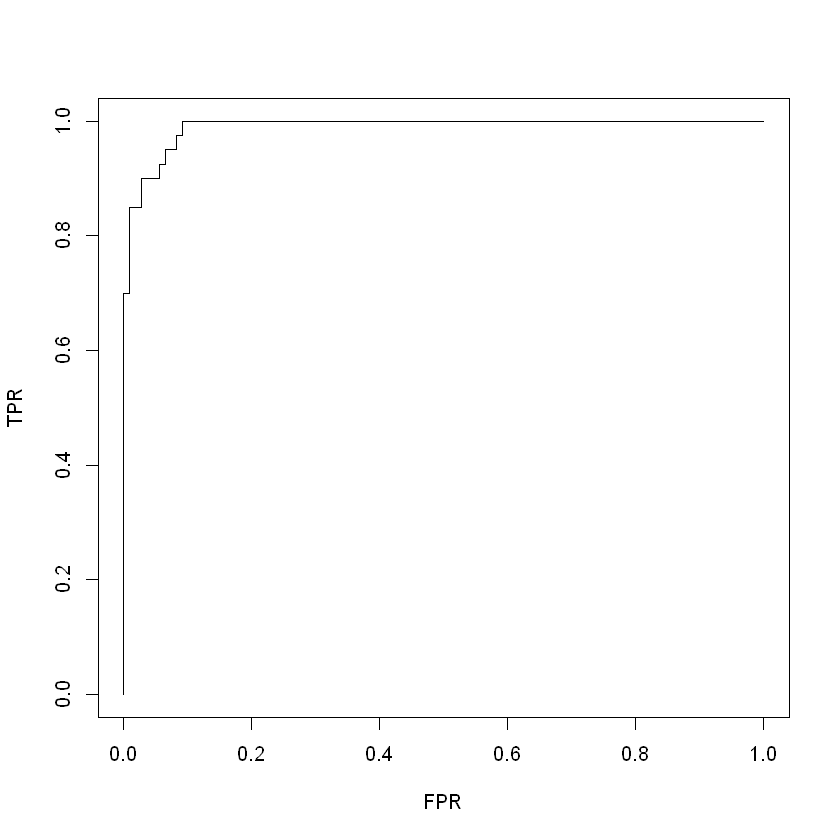

In [24]:
ROC_calculation(s_test$Chance.of.Admit,s_pred)

In [25]:
# plot 그리는 것을 뺀 함수입니다.
ROC_calculation_rmplot <- function(label, pred){
    tmp <-  sort(pred, decreasing = TRUE, index.return=TRUE) # 예측한 확률값들을 내림차순으로 정렬
    pred_pb <- pred[tmp$ix] # 내림차순으로 정렬한 index를 가져와 pred를 pred_pb에 정렬
    label <- label[tmp$ix] # 비교하는 label값도 순서가 같아야 하므로 내림차순한 인덱스 활용하여 정렬
    pred <- rep(0,length(pred)) # ROC커브에서 1,0으로 변환되는 것이 들어가는 곳
    dum <- matrix(0,nrow=2,ncol=1)
    #confusion matrix에서 둘다 0이 나오면, 한 칼럼이 사라진다. 그것을 방지하기 위한 매트릭스
    TPR <- c(length(pred)+1) # TPR값 저장소
    FPR <- c(length(pred)+1) # FPR값 저장소
    TPR[1] <- 0 # 처음값은 0이다.
    FPR[1] <- 0 # 처음값은 0이다.
    diff_FPR <- 0 # 면적 게산시에 가로축의 길이를 저장할 변수
    ROC <- 0 # ROC의 면적을 더해 갈 변수
    for(i in 1:length(pred)){
        pred[which(pred_pb >= pred_pb[i])] <- 1 # cutoff를 한칸씩 옮겨준다
        cm <- cbind(table(label, pred),dum) # confusion matrix생성. 혹시나 0,0 이 나오는 것을 대비해 dum 추가
        TPR[i+1] <- cm[2,2]/sum(cm[2,]) # TPR 계산
        FPR[i+1] <- cm[1,2]/sum(cm[1,]) # FPR 계산
        if(i>1){
            diff_FPR <- FPR[i+1] - FPR[(i)] # 가로축 길이 계산
        }
        ROC <- ROC + TPR[i+1]*diff_FPR # 면적 계산
        if (i == length(pred)){
            TPR[i+1] <- 1 
            # TPR의 마지막 값은 1이다. 그런데 confusion matrix가 열이 0 일때가 0,0이 나와 한칸 밀리게 된다.
            # 그것을 보정해 주기 위하여 1을 넣어준다.
            FPR[i+1] <- 1 # 위와 마찬가지
        }
    }
    
    #plot(FPR, TPR, type = "l") # ROC커브 그리기

    return (ROC) #ROC 면적값 리턴
}

In [26]:
AUROC_mat <- matrix(0, 5, 2)
colnames(AUROC_mat) <- c("seed","AUROC")
seed_vector <- c(41,42,43,44,45)
for(i in 1:5){
    set.seed(seed_vector[i])
    AUROC_mat[i,1] = seed_vector[i]
    trn_idx <- sample(1:nrow(df_scaled),round(0.7*nrow(df_scaled))) # sample함수를 이용해 trainset index저장
    s_train <- df_scaled[trn_idx,]
    s_test <- df_scaled[-trn_idx,]
    s_lr <- glm(s_train$Chance.of.Admit ~ .,family = binomial, s_train) #standardscaler 데이터로 학습
    s_pred <- predict(s_lr, type="response", newdata = s_test[,1:7])
    AUROC_mat[i,2] = ROC_calculation_rmplot(s_test$Chance.of.Admit,s_pred)
}
AUROC_mat

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

seed,AUROC
41,0.9807339
42,0.9624835
43,0.9604078
44,0.9820097
45,0.9324610


# [Q8] 이 외 웹이나 기타 자료들을 통해 재미있는 데이터셋(fun dataset)을 찾아 나름대로의 로지스틱 회귀 분석 모형 구축 및 결과 해석을 수행하시오.

In [27]:
install.packages("caret") 
library(caret)
install.packages("nnet")
library(nnet)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmwlm\AppData\Local\Temp\Rtmp4Opsqm\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



  There is a binary version available but the source version is later:
     binary source needs_compilation
nnet 7.3-13 7.3-14              TRUE

  Binaries will be installed
package 'nnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'nnet'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\lmwlm\Anaconda3\Lib\R\library\00LOCK\nnet\libs\x64\nnet.dll를 C:\Users\lmwlm\Anaconda3\Lib\R\library\nnet\libs\x64\nnet.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'nnet'"


The downloaded binary packages are in
	C:\Users\lmwlm\AppData\Local\Temp\Rtmp4Opsqm\downloaded_packages


In [28]:
data <- read.csv('train.csv')
head(data)

id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.3545122,0.3508390,0.4657609,0.7811417,clear,Ghoul
1,0.5755599,0.4258684,0.5314014,0.4398989,green,Goblin
2,0.4678755,0.3543304,0.8116161,0.7912250,black,Ghoul
4,0.7766525,0.5087225,0.6367656,0.8844637,black,Ghoul
5,0.5661166,0.8758618,0.4185937,0.6364378,green,Ghost
7,0.4056797,0.2532775,0.4414197,0.2803238,green,Goblin


In [29]:
tmp <- data

In [30]:
# color에 대한 원핫 인코딩을 하는 작업
dmy <- dummyVars(~., data = data[,1:6]) # type은 원핫인코딩되면 안되는 칼럼이기에 제외
data <- data.frame(predict(dmy, newdata = data))
head(data)

id,bone_length,rotting_flesh,hair_length,has_soul,color.black,color.blood,color.blue,color.clear,color.green,color.white
0,0.3545122,0.3508390,0.4657609,0.7811417,0,0,0,1,0,0
1,0.5755599,0.4258684,0.5314014,0.4398989,0,0,0,0,1,0
2,0.4678755,0.3543304,0.8116161,0.7912250,1,0,0,0,0,0
4,0.7766525,0.5087225,0.6367656,0.8844637,1,0,0,0,0,0
5,0.5661166,0.8758618,0.4185937,0.6364378,0,0,0,0,1,0
7,0.4056797,0.2532775,0.4414197,0.2803238,0,0,0,0,1,0


In [31]:
data$type <- tmp$type # type이 빠져있으므로, tmp에 저장해둔 type을 가져옴
data <- subset(data,select=-id) # id는 필요 없으니 제거

In [32]:
head(data)

bone_length,rotting_flesh,hair_length,has_soul,color.black,color.blood,color.blue,color.clear,color.green,color.white,type
0.3545122,0.3508390,0.4657609,0.7811417,0,0,0,1,0,0,Ghoul
0.5755599,0.4258684,0.5314014,0.4398989,0,0,0,0,1,0,Goblin
0.4678755,0.3543304,0.8116161,0.7912250,1,0,0,0,0,0,Ghoul
0.7766525,0.5087225,0.6367656,0.8844637,1,0,0,0,0,0,Ghoul
0.5661166,0.8758618,0.4185937,0.6364378,0,0,0,0,1,0,Ghost
0.4056797,0.2532775,0.4414197,0.2803238,0,0,0,0,1,0,Goblin


In [33]:
perf_eval3 <- function(cm){
  
  # Simple accuracy
  ACC <- sum(diag(cm))/sum(cm)
  
  # ACC for each class, 
  A1 <- cm[1,1]/sum(cm[1,])
  A2 <- cm[2,2]/sum(cm[2,])
  A3 <- cm[3,3]/sum(cm[3,])
  BCR <- (A1*A2*A3)^(1/3)
  
  return(c(ACC, BCR))
}

In [34]:
data$type <- as.factor(data$type) # type이 문자로 되어있기 때문에, 범주로 바꿔줍니다.
data$type <- relevel(data$type, ref = "Ghoul") # 기준 범주를 선택해 줍니다. 3개 중 랜덤하게 정했습니다.

In [35]:
set.seed(41)
trn_idx <- sample(1:nrow(data),round(0.7*nrow(data)))
train <- data[trn_idx,]
test <- data[-trn_idx,]
mult_lr <- multinom(type ~ ., data = train) # 다중 로지스틱 회귀 모델 생성

# weights:  36 (22 variable)
initial  value 285.639195 
iter  10 value 145.198773
iter  20 value 127.814593
iter  30 value 127.757769
final  value 127.757750 
converged


In [36]:
summary(mult_lr)

Call:
multinom(formula = type ~ ., data = train)

Coefficients:
       (Intercept) bone_length rotting_flesh hair_length   has_soul color.black
Ghost    16.326140  -16.718417     12.545524  -21.373453 -17.107998   1.3642216
Goblin    8.545092   -5.972704     -1.354064   -5.512868  -5.948026   0.9501995
       color.blood color.blue color.clear color.green color.white
Ghost     7.210996   1.368683    2.905723    2.136214   1.3403014
Goblin    1.353576   2.059175    1.241936    2.058121   0.8820834

Std. Errors:
       (Intercept) bone_length rotting_flesh hair_length has_soul color.black
Ghost     2.465836    3.299643       3.02646    3.739446 3.049959   1.0917413
Goblin    1.469510    1.822192       1.46369    1.637399 1.535185   0.5809589
       color.blood color.blue color.clear color.green color.white
Ghost     3.743416  1.5337113   0.9520143   1.1699669   0.8264225
Goblin    1.206193  0.7595562   0.4435352   0.7355973   0.4017584

Residual Deviance: 255.5155 
AIC: 295.5155 

In [37]:
t(summary(mult_lr)$coefficients)

,Ghost,Goblin
(Intercept),16.326140,8.5450920
bone_length,-16.718417,-5.9727036
rotting_flesh,12.545524,-1.3540638
hair_length,-21.373453,-5.5128679
has_soul,-17.107998,-5.9480256
color.black,1.364222,0.9501995
color.blood,7.210996,1.3535763
color.blue,1.368683,2.0591750
color.clear,2.905723,1.2419365
color.green,2.136214,2.0581214


In [40]:
z_stats <- summary(mult_lr)$coefficients/summary(mult_lr)$standard.errors 
#t(z_stats)

p_value <- (1-pnorm(abs(z_stats), 0, 1))*2
options(scipen=10)
#t(p_value) 

cbind(t(summary(mult_lr)$coefficients), t(p_value)) #회귀계수와 P-value를 함께 보여줍니다.

,Ghost,Goblin,Ghost,Goblin
(Intercept),16.326140,8.5450920,0.00000000003569345,0.000000006066007
bone_length,-16.718417,-5.9727036,0.00000040469766094,0.001046349333658
rotting_flesh,12.545524,-1.3540638,0.00003393976853472,0.354912411552504
hair_length,-21.373453,-5.5128679,0.00000001092708013,0.000760332803898
has_soul,-17.107998,-5.9480256,0.00000002031993995,0.000106858286564
color.black,1.364222,0.9501995,0.21145183507449672,0.101929434998096
color.blood,7.210996,1.3535763,0.05406511814733506,0.261782345363355
color.blue,1.368683,2.0591750,0.37217875016801139,0.006707579644048
color.clear,2.905723,1.2419365,0.00227182265283621,0.005108911951103
color.green,2.136214,2.0581214,0.06786902104895587,0.005143740032508


In [39]:
mult_lr_haty <- predict(mult_lr, type="probs", newdata = test) # 예측 확률값 담기
mult_lr_haty[1:10,]

# Predict the class label
mult_lr_prey <- predict(mult_lr, newdata = test) # 예측 결과 담기

cfmatrix <- table(test$type, mult_lr_prey) # 예측 결과를 이용하여 평가지표 계산
cfmatrix
perf_eval3(cfmatrix)

,Ghoul,Ghost,Goblin
2,0.2599874929,0.00236223451185,0.73765027
3,0.9507121424,0.00000006051509,0.04928780
12,0.9787134548,0.00000113491825,0.02128541
15,0.7397102883,0.00001441556262,0.26027530
17,0.0396790450,0.06253030435685,0.89779065
23,0.2998810624,0.00706044166879,0.69305850
25,0.8789559820,0.00000114655247,0.12104287
32,0.0005254666,0.94273845350723,0.05673608
33,0.8402109510,0.00086119399235,0.15892785
34,0.0620245008,0.03185383353741,0.90612167


        mult_lr_prey
         Ghoul Ghost Goblin
  Ghoul     27     0      6
  Ghost      0    25      6
  Goblin    13     2     32

[1] 0.7567568 0.7658789